In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
columns_to_drop=['PassengerId','Name','Cabin','Ticket','Embarked']

In [6]:
data_clean=df.drop(columns_to_drop,axis=1)

In [7]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data_clean['Sex']=le.fit_transform(data_clean['Sex'])

In [11]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [13]:
data_clean=data_clean.fillna(data_clean['Age'].mean())

In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [15]:
#in pandas we use loc to access rows and columns
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [16]:
input_col=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_col=['Survived']

X=data_clean[input_col]
Y=data_clean[output_col]

print(X.shape,Y.shape)

(891, 6) (891, 1)


In [17]:
a=np.array([1,1,0,0,1])

count=np.unique(a,return_counts=True)

print(count)
print(a.shape[0])

(array([0, 1]), array([2, 3]))
5


In [18]:
def entropy(col):
    
    count=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    
    entropy=0.0
    
    for ix in count[1]:
        p=ix/N
        entropy+=(-1.0*p*np.log2(p))
    return entropy
    

In [19]:
def divide_data(x_data,fkey,fval):
    
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):
        val=x_data[fkey].loc[i]
        
        if val>fval:
            x_right=x_right.append(x_data.loc[i]) #copying whole row
        else:
            x_left=x_left.append(x_data.loc[i])
    return x_left,x_right

In [20]:
#x_left,x_right=divide_data(data_clean,'Sex',0.5)
#print(x_left)
#print(x_right)

In [21]:
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    # % of total samples on left and right 
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    # all examples are on same side
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000; #minimum information gain
    
    i_gain=entropy(x_data.Survived)- (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain
    
    
    

In [22]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [23]:

class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

        
        
            
        
            
            
        

In [24]:
d=DecisionTree()
d.train(data_clean)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Feat

In [25]:
split=int(0.7*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [26]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [28]:
dt=DecisionTree()
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [29]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [30]:
ypred=[]
for i in range(test_data.shape[0]):
    ypred.append(dt.predict(test_data.loc[i]))

In [31]:
ypred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [32]:
y_actual = test_data['Survived']

In [33]:
y_actual

0      0
1      0
2      0
3      0
4      1
      ..
263    0
264    1
265    0
266    1
267    0
Name: Survived, Length: 268, dtype: int64

In [34]:
ypred=le.fit_transform(ypred)

In [35]:
print(ypred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [36]:
print(ypred.shape)
print(y_actual.shape)

(268,)
(268,)


In [37]:
acc=np.sum(ypred==y_actual)/ypred.shape[0]    #its called broadcasting ypred==y_actaul 

In [38]:
print(acc)

0.8171641791044776


### Decision Tree using Sklearn

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [41]:
sk_tree.fit(train_data[input_col],train_data['Survived'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
sk_tree.predict(test_data[input_col])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [43]:
sk_tree.score(test_data[input_col],test_data['Survived'])

0.8283582089552238

### Visualise Decision Tree

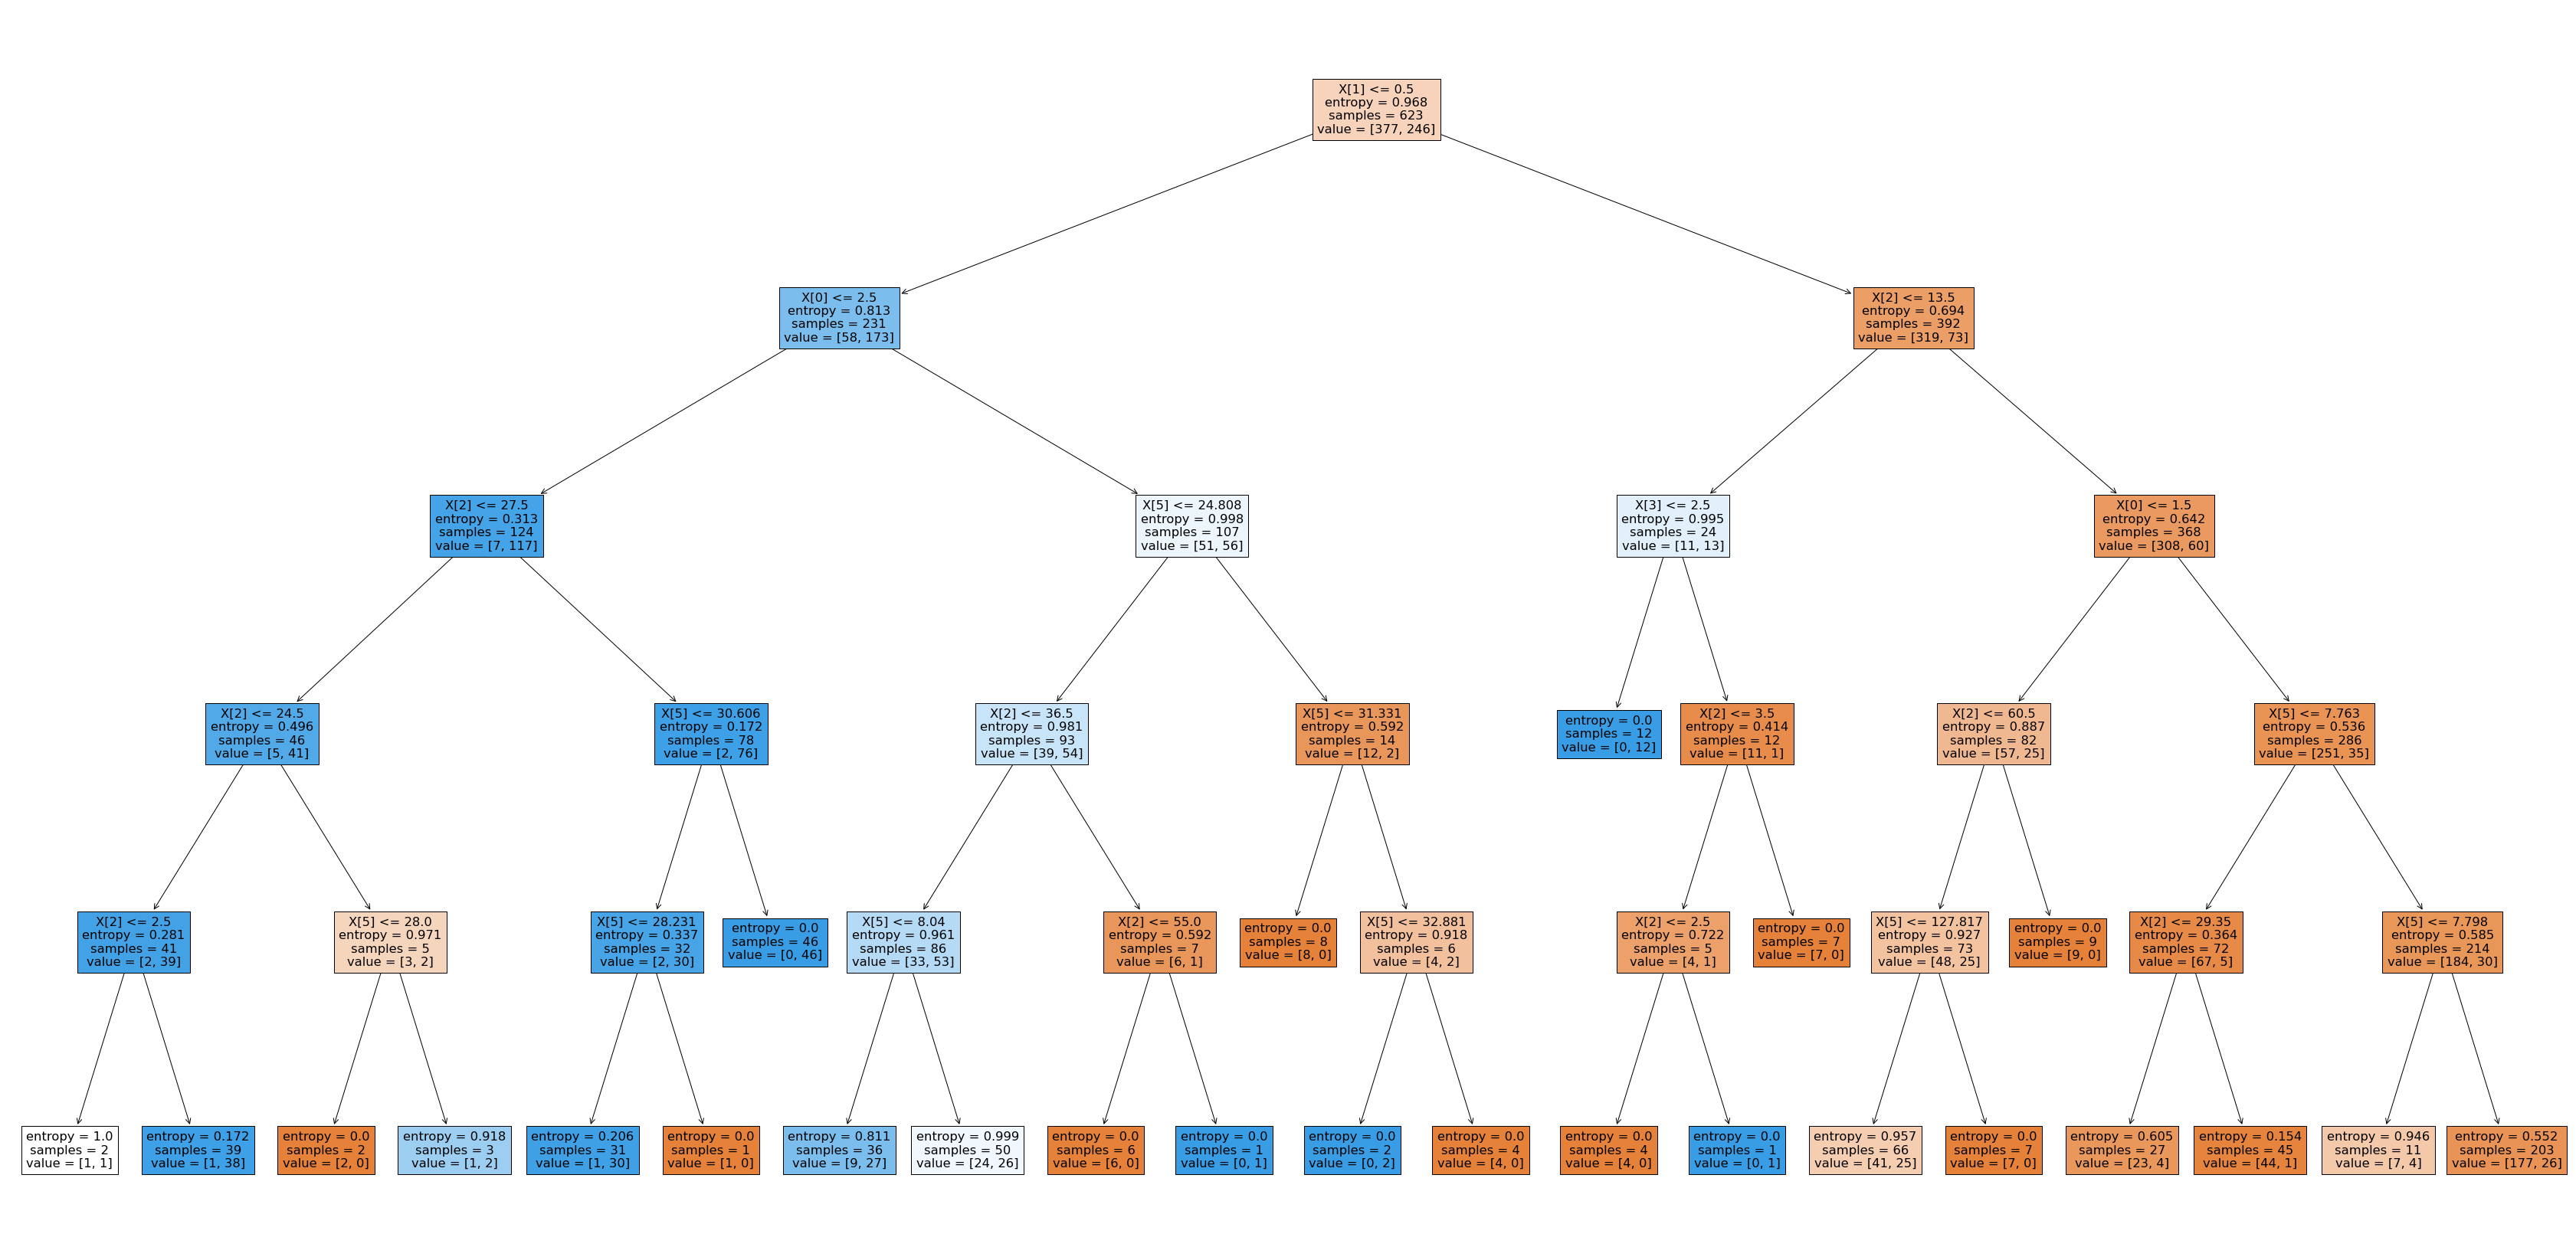

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(sk_tree, filled=True);

### Random Forest

In [46]:
X_train = train_data[input_col]
Y_train = np.array(train_data['Survived']).reshape((-1,))
X_test = test_data[input_col]
Y_test = np.array(test_data['Survived']).reshape((-1,))

In [47]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [48]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [51]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [52]:
rf.score(X_train,Y_train)

0.8491171749598716

In [53]:
rf.score(X_test,Y_test)

0.832089552238806

In [54]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [55]:
print(acc)

0.8185548387096773


In [56]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [57]:
print(acc_list)

[0.7607354838709679, 0.7641290322580646, 0.772090322580645, 0.7833161290322581, 0.7848258064516129, 0.7913419354838709, 0.804116129032258, 0.7929419354838709, 0.824967741935484, 0.8121935483870967, 0.8009935483870969, 0.8154064516129033, 0.808941935483871, 0.8201677419354837, 0.7993548387096773, 0.8009290322580644, 0.8122064516129033, 0.8025548387096773, 0.8009419354838709, 0.8106064516129031, 0.816941935483871, 0.8250064516129033, 0.8201806451612903, 0.816941935483871, 0.7897290322580645, 0.7993290322580645, 0.8137806451612903, 0.8041290322580645, 0.8249935483870967, 0.8138193548387097, 0.816941935483871, 0.8137548387096775, 0.8233935483870969, 0.8250193548387097, 0.8217548387096775, 0.8137290322580645, 0.8282193548387097, 0.8201548387096775, 0.8266064516129031, 0.8169548387096774, 0.8169677419354839, 0.8185677419354839, 0.8282193548387097, 0.8121935483870967, 0.8185548387096775, 0.8233806451612903, 0.8249548387096775, 0.8153548387096773, 0.8041419354838709]


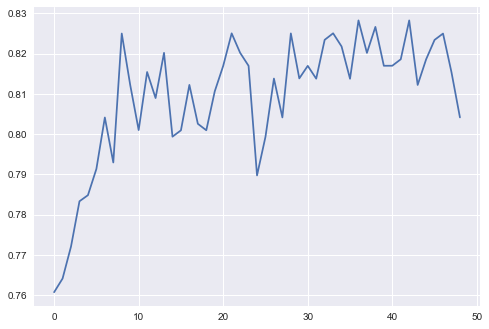

In [58]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [59]:
print(np.argmax(acc_list))

36


In [60]:
rf = RandomForestClassifier(n_estimators=36,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=36)

In [61]:
rf.score(X_train,Y_train)

0.8619582664526485

In [62]:
rf.score(X_test,Y_test)

0.835820895522388